<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_004_mentoring/_000_mnist_k_add_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mnist 교수님 작성 코드


## 주석 추가 버전

In [ ]:
from keras.utils import np_utils  # numpy utils 
from keras.datasets import mnist # mnist 데이터 셋 로드
from keras.models import Sequential  # layer를 순차적으로 적재해주는 모델
from keras.layers import Dense, Activation  # 사용할 layer 
import numpy as np  # numpy

In [ ]:
np.random.seed(3)

- numpy random 값을 일정하게 설정

  ex) 한 번 3이 나오면 다음 실행에도 3이 나옴

## 데이터셋 준비

In [ ]:
# 훈련셋과 시험셋 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- 두 가지로 분류
  * **x**
    + train
    + test
    
  * **y**
    + train
    + test


## train 데이터 개수를 분리해서 validation 값을 추출한다.

해당 작업을 끝낸 후 총 세 개의 형태가 나온다.

- train
  + x
  + y

- test
  + x
  + y

- val (validation)
  + x
  + y

In [ ]:
x_val = x_train[50000:] # validation
y_val = y_train[50000:] # validation

print('before len: {}'.format(len(x_train)))
x_train = x_train[:50000] # 
y_train = y_train[:50000]
print('after len: {}'.format(len(x_train)))

before len: 60000
after len: 50000


## scaling

최대값 255 -> 최대값 1.0 으로 변경
--

ex) 

255 -> 1.0

244 -> 0.9568627450980393


In [ ]:
x_train = x_train.reshape(50000, 784).astype('float32') / 255.
x_val = x_val.reshape(10000, 784).astype('float32') / 255.
x_test = x_test.reshape(10000, 784).astype('float32') / 255.

- 최대값이 1.0으로 변경됨

## 훈련, 검증셋 랜덤으로 추출하기

In [ ]:
target_arr = np.random.choice(50000, 700)
print('{}개의 원소를, 총 {} row로 추출'.format(len(np.unique(target_arr)), len(target_arr)))

693개의 원소를, 총 700 row로 추출


In [ ]:
train_random_indexs = np.random.choice(50000, 700)
val_random_indexs = np.random.choice(10000, 300)
train_random_indexs[:5], val_random_indexs[:5]

(array([ 3464, 25781, 32426, 16398,  3808]),
 array([7260, 2026, 8615, 3810, 1306]))

- 랜덤한 인덱스 값들을 추출

In [ ]:
x_train = x_train[train_random_indexs]
y_train = y_train[train_random_indexs]

x_val = x_val[val_random_indexs]
y_val = y_val[val_random_indexs]

## one hot encoding

In [ ]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

현재 정답이 7일 경우 정답의 '인덱스' 자리에 1로 표기, 나머지 0의 (np)array가 반환됨.

    [6] -> [0 0 0 0 0 0 1 0 0 0]



## build model (모델 구성하기)

In [ ]:
model = Sequential() # Sequential 인스턴스 생성의 키워드 ()
# 3 개의 축약된 문법으로 풀어서 작성하면. 아래와 같다.
"""
1. Input layer
2. Dense layer
3. Activation layer
"""
model.add(Dense(units=2, input_dim=28 * 28, activation='relu'))

"""
1. Dense layer
2. Activation layer
"""
model.add(Dense(units=10, activation='softmax'))

## stand by model ( compile model )

In [ ]:
# 손실함수, 최적화 객체, 출력할 평가 지표 등록
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## train model

In [ ]:
# 모델 학습시키기
hist = model.fit(x_train,  # 훈련할 데이터 수치
                 y_train,  # 훈련 데이터의 정답
                 epochs=100,  # 반복할 횟수
                 batch_size=64,  # 반복 사이즈 크기
                 validation_data=(x_val, y_val))  # 훈련 중간마다 검증할 데이터(검증할 데이터 + 검증할 데이터의 정답)

In [ ]:
import matplotlib.pyplot as plt  # 시각화 라이브러리

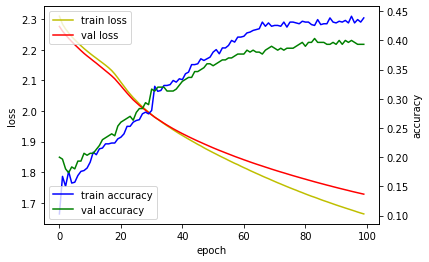

In [ ]:
fig, loss_ax = plt.subplots()  # 1. 이미지 박스 생성

acc_ax = loss_ax.twinx()  # 2. 한 개의 이미지 박스에 여러 라인을 그리기 위해 참조 주소를 복제한다.

"""
hist 객체에 담긴 history 객체의 값을 시각화 한다.

1. loss
2. val_loss

3. accuracy
4. val_accuracy

"""

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 3. 훈련 데이터의 손실 (오류) plot 차트 그리기
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 4. 검증 데이터의 손실 plot 차트 그리기

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')  # 5. 검증 데이터의 정확도 plot 차트 그리기
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')  # 6. 검증 데이터의 정확도 plot 차트 그리기


loss_ax.set_xlabel('epoch')  # x: 반복 label 추가
loss_ax.set_ylabel('loss')  # y: 손실 label 추가
acc_ax.set_ylabel('accuracy') # y: 정확도 label 추가

loss_ax.legend(loc='upper left') # 범례 위치 지정 (위, 왼쪽)
acc_ax.legend(loc='lower left')  # 범례 위치 (아래, 왼쪽)

# plt.show()  # 시각화 실행 (colab은 호출하지 않아도 됨.)